## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Import Dataset

In [2]:
df = pd.read_csv('/kaggle/input/preprocessed-fake-reviews-dataset/preprocessed-fake-reviews-dataset.csv')

In [3]:
df.head()

,rating,label,text_,cleaned_text,category_Books_5,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,category_Home_and_Kitchen_5,category_Kindle_Store_5,category_Movies_and_TV_5,category_Pet_Supplies_5,category_Sports_and_Outdoors_5,category_Tools_and_Home_Improvement_5,category_Toys_and_Games_5
0,5.0,1,"Love this! Well made, sturdy, and very comfor...",Love this Well made sturdy and very comfortab...,False,False,False,True,False,False,False,False,False,False
1,5.0,1,"love it, a great upgrade from the original. I...",love it a great upgrade from the original Ive...,False,False,False,True,False,False,False,False,False,False
2,5.0,1,This pillow saved my back. I love the look and...,This pillow saved my back I love the look and ...,False,False,False,True,False,False,False,False,False,False
3,1.0,1,"Missing information on how to use it, but it i...",Missing information on how to use it but it is...,False,False,False,True,False,False,False,False,False,False
4,5.0,1,Very nice set. Good quality. We have had the s...,Very nice set Good quality We have had the set...,False,False,False,True,False,False,False,False,False,False


In [4]:
df.isnull().sum()

rating                                   0
label                                    0
text_                                    0
cleaned_text                             1
category_Books_5                         0
category_Clothing_Shoes_and_Jewelry_5    0
category_Electronics_5                   0
category_Home_and_Kitchen_5              0
category_Kindle_Store_5                  0
category_Movies_and_TV_5                 0
category_Pet_Supplies_5                  0
category_Sports_and_Outdoors_5           0
category_Tools_and_Home_Improvement_5    0
category_Toys_and_Games_5                0
dtype: int64

In [5]:
df['cleaned_text'] = df['cleaned_text'].fillna("")

In [6]:
df.isnull().sum()

rating                                   0
label                                    0
text_                                    0
cleaned_text                             0
category_Books_5                         0
category_Clothing_Shoes_and_Jewelry_5    0
category_Electronics_5                   0
category_Home_and_Kitchen_5              0
category_Kindle_Store_5                  0
category_Movies_and_TV_5                 0
category_Pet_Supplies_5                  0
category_Sports_and_Outdoors_5           0
category_Tools_and_Home_Improvement_5    0
category_Toys_and_Games_5                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rating                                 40432 non-null  float64
 1   label                                  40432 non-null  int64  
 2   text_                                  40432 non-null  object 
 3   cleaned_text                           40432 non-null  object 
 4   category_Books_5                       40432 non-null  bool   
 5   category_Clothing_Shoes_and_Jewelry_5  40432 non-null  bool   
 6   category_Electronics_5                 40432 non-null  bool   
 7   category_Home_and_Kitchen_5            40432 non-null  bool   
 8   category_Kindle_Store_5                40432 non-null  bool   
 9   category_Movies_and_TV_5               40432 non-null  bool   
 10  category_Pet_Supplies_5                40432 non-null  bool   
 11  ca

In [8]:
df.describe()

,rating,label
count,40432.000000,40432.000000
mean,4.256579,0.500000
std,1.144354,0.500006
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.500000
75%,5.000000,1.000000
max,5.000000,1.000000


## Data Splitting

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df, df['label'], test_size=0.2, random_state=42, stratify=df['label'])

In [10]:
train_label_counts = y_train.value_counts()
test_label_counts = y_test.value_counts()

print("Jumlah Real Review Train (0):", train_label_counts[0])
print("Jumlah Fake Review Train (1):", train_label_counts[1])
print("Jumlah Real Review Test (0):", test_label_counts[0])
print("Jumlah Fake Review Test (1):", test_label_counts[1])

Jumlah Real Review Train (0): 16172
Jumlah Fake Review Train (1): 16173
Jumlah Real Review Test (0): 4044
Jumlah Fake Review Test (1): 4043


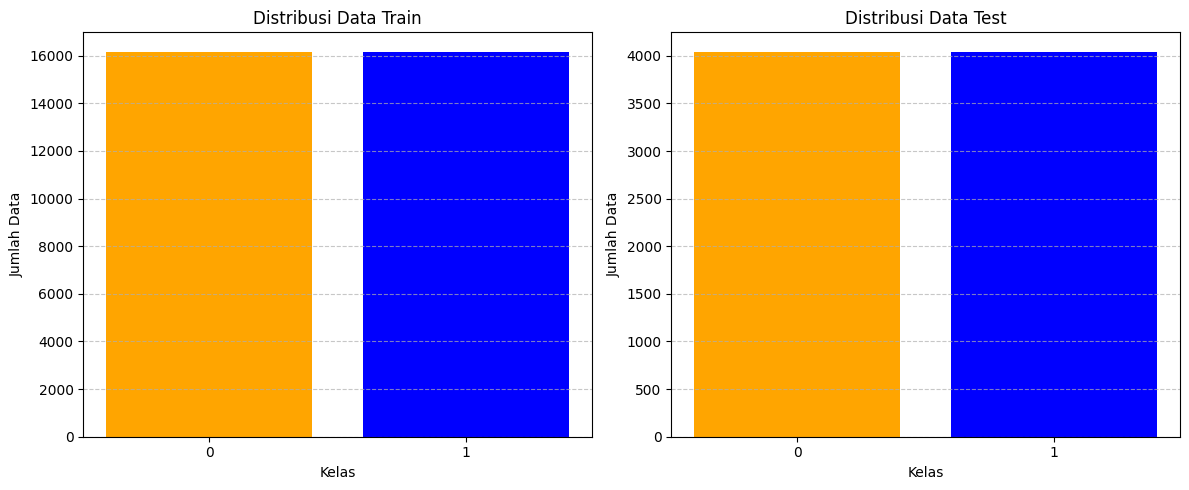

In [11]:
train_counts = Counter(y_train)
test_counts = Counter(y_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(train_counts.keys(), train_counts.values(), color=['blue', 'orange'])
axes[0].set_title('Distribusi Data Train')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0', '1'])
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah Data')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(test_counts.keys(), test_counts.values(), color=['blue', 'orange'])
axes[1].set_title('Distribusi Data Test')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0', '1'])
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah Data')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## TF-IDF

In [12]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=30, max_df=0.90, strip_accents='unicode', sublinear_tf=True)
X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_text'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_text'])

In [13]:
print("Jumlah fitur yang diekstrak:", len(vectorizer.vocabulary_))

Jumlah fitur yang diekstrak: 10256


In [14]:
df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("Data hasil ekstraksi (train):\n", df_train_tfidf.head())
print("Data hasil ekstraksi (test):\n", df_test_tfidf.head())

Data hasil ekstraksi (train):
     aa  ability  ability to  able  able to  about  about an  about and  \
0  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
1  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
2  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
3  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
4  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   

   about buying  about getting  ...  youtube  youve   yr  yr old  zero  zip  \
0           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
1           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
2           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
3           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
4           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   

   zipper  zipper is  zippers  zoom  
0     0.0  

## Random Forest

In [15]:
# Training
rf_model = RandomForestClassifier(random_state=42)
start = time.time()
rf_model.fit(X_train_tfidf, y_train)
print(f"Training Time: {time.time() - start:.2f} s")

Training Time: 70.03 s


In [16]:
# Evaluation
rf_y_pred = rf_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, rf_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, rf_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, rf_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9038
Presisi (Fake Review): 0.9306
Recall (Fake Review): 0.8726
F1-Score (Fake Review): 0.9007


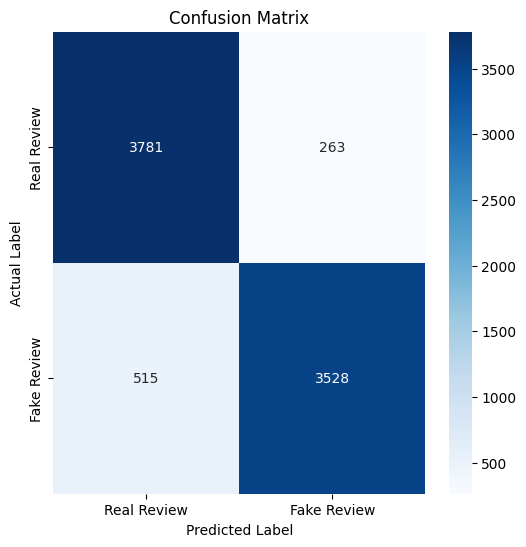

In [17]:
conf_matrix = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real Review', 'Fake Review'], yticklabels=['Real Review', 'Fake Review'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [18]:
print("Classification Report:")
print(classification_report(y_test, rf_y_pred, target_names=['Real Review', 'Fake Review']))

Classification Report:
              precision    recall  f1-score   support

 Real Review       0.88      0.93      0.91      4044
 Fake Review       0.93      0.87      0.90      4043

    accuracy                           0.90      8087
   macro avg       0.91      0.90      0.90      8087
weighted avg       0.91      0.90      0.90      8087



## SVM

In [19]:
# Training
svm_model = SVC()
start = time.time()
svm_model.fit(X_train_tfidf, y_train)
print(f"Training Time: {time.time() - start:.2f} s")

Training Time: 782.04 s


In [20]:
print(svm_model.gamma)
print(svm_model._gamma)

scale
1.0049528879836023


In [21]:
# Evaluation
svm_y_pred = svm_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, svm_y_pred)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, svm_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, svm_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, svm_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9504
Presisi (Fake Review): 0.9612
Recall (Fake Review): 0.9387
F1-Score (Fake Review): 0.9498


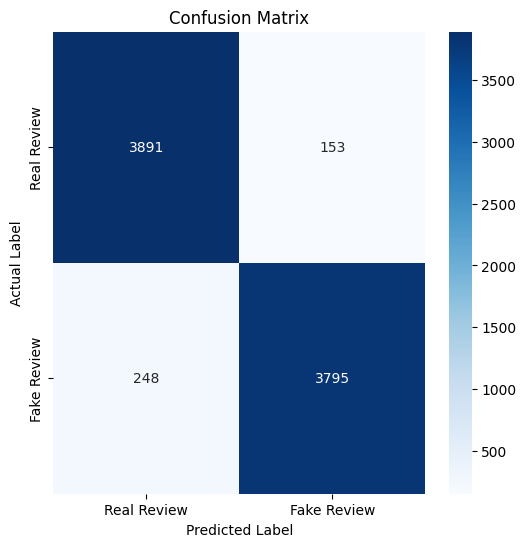

In [22]:
conf_matrix = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real Review', 'Fake Review'], yticklabels=['Real Review', 'Fake Review'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [23]:
print("Classification Report:")
print(classification_report(y_test, svm_y_pred, target_names=['Real Review', 'Fake Review']))

Classification Report:
              precision    recall  f1-score   support

 Real Review       0.94      0.96      0.95      4044
 Fake Review       0.96      0.94      0.95      4043

    accuracy                           0.95      8087
   macro avg       0.95      0.95      0.95      8087
weighted avg       0.95      0.95      0.95      8087



## Naive Bayes

In [24]:
# Training
nb_model = MultinomialNB()
start = time.time()
nb_model.fit(X_train_tfidf, y_train)
print(f"Training Time: {time.time() - start:.2f} s")

Training Time: 0.02 s


In [25]:
# Evaluation
nb_y_pred = nb_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, nb_y_pred)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, nb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, nb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, nb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9026
Presisi (Fake Review): 0.8974
Recall (Fake Review): 0.9090
F1-Score (Fake Review): 0.9032


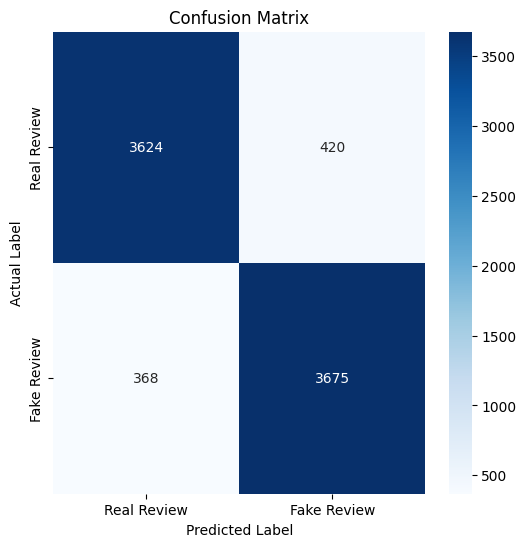

In [26]:
conf_matrix = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real Review', 'Fake Review'], yticklabels=['Real Review', 'Fake Review'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [27]:
print("Classification Report:")
print(classification_report(y_test, nb_y_pred, target_names=['Real Review', 'Fake Review']))

Classification Report:
              precision    recall  f1-score   support

 Real Review       0.91      0.90      0.90      4044
 Fake Review       0.90      0.91      0.90      4043

    accuracy                           0.90      8087
   macro avg       0.90      0.90      0.90      8087
weighted avg       0.90      0.90      0.90      8087



## XGBoost

In [28]:
xgb_model = XGBClassifier(random_state=42)
start = time.time()
xgb_model.fit(X_train_tfidf, y_train)
print(f"Training Time: {time.time() - start:.2f} s")

Training Time: 47.06 s


In [29]:
# Evaluation
xgb_y_pred = xgb_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, xgb_y_pred)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, xgb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, xgb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, xgb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9028
Presisi (Fake Review): 0.9183
Recall (Fake Review): 0.8842
F1-Score (Fake Review): 0.9010


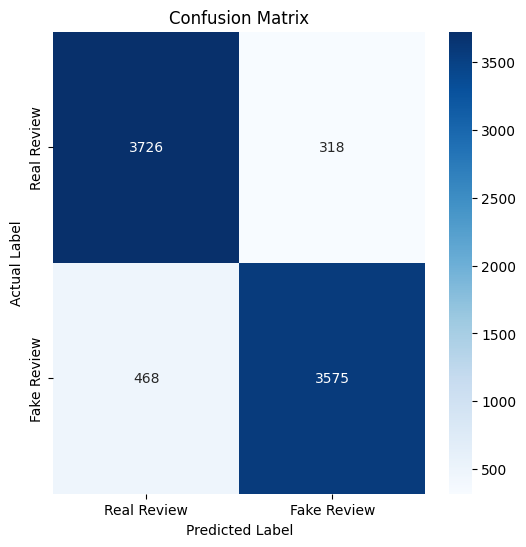

In [30]:
conf_matrix = confusion_matrix(y_test, xgb_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real Review', 'Fake Review'], yticklabels=['Real Review', 'Fake Review'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [31]:
print("Classification Report:")
print(classification_report(y_test, xgb_y_pred, target_names=['Real Review', 'Fake Review']))

Classification Report:
              precision    recall  f1-score   support

 Real Review       0.89      0.92      0.90      4044
 Fake Review       0.92      0.88      0.90      4043

    accuracy                           0.90      8087
   macro avg       0.90      0.90      0.90      8087
weighted avg       0.90      0.90      0.90      8087

